In [2]:
def countAmino(seq):
    amino = {}
    for char in seq:
        amino[char] = seq.count(char)

    return amino

sequence = ""

with open("G3V5D1.txt") as data:
    data.readline()
    for line in data:
        for char in line:
            if char == '\n':
                continue
            else:
                sequence += char
    
aminoDict = countAmino(sequence)

print(aminoDict)

{'M': 6, 'K': 8, 'R': 4, 'T': 13, 'P': 13, 'Q': 2, 'Y': 2, 'S': 9, 'N': 2, 'G': 7, 'C': 6, 'F': 5, 'A': 5, 'W': 7, 'H': 5, 'V': 10, 'E': 3, 'D': 2, 'I': 1, 'L': 3}


In [22]:
from nltk.corpus import words

string_list = ["Hello","helo","test","taxe"]
misspelled_list = []
word_list = words.words()

for string in string_list:
    if string.lower() in word_list:
        continue
    else:
        misspelled_list.append(string)

print(misspelled_list)

['helo', 'taxe']


<Axes: xlabel='Samples', ylabel='Counts'>

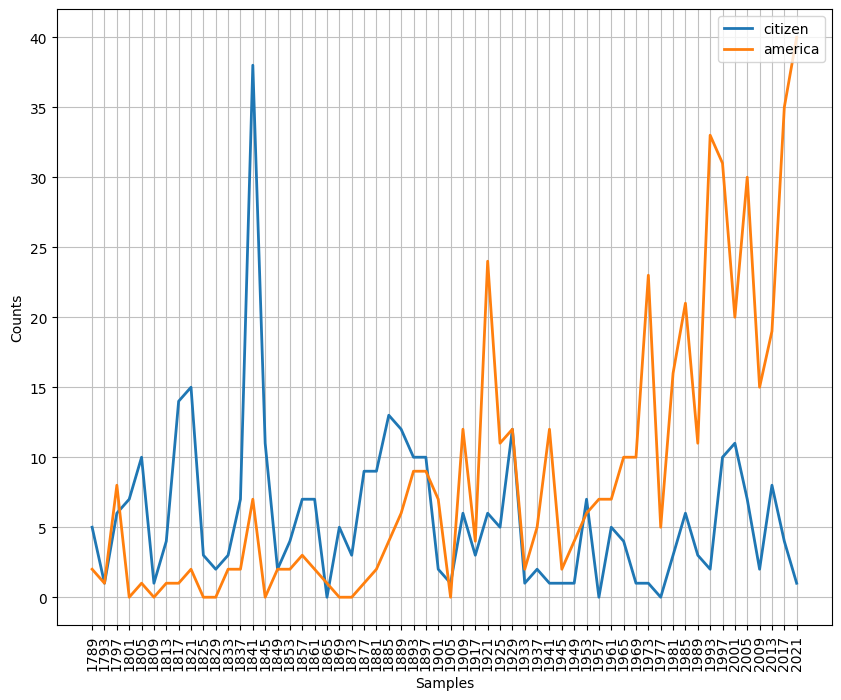

In [2]:
import nltk
from nltk.corpus import inaugural
from nltk import ConditionalFreqDist

import matplotlib.pyplot as plt
cfd = nltk.ConditionalFreqDist(
                (target, fileid[:4])
                for fileid in inaugural.fileids()
                for w in inaugural.words(fileid)
                for target in ['america', 'citizen']
                if w.lower().startswith(target))
plt.figure(figsize=(10,8))
cfd.plot()

<Axes: xlabel='Samples', ylabel='Counts'>

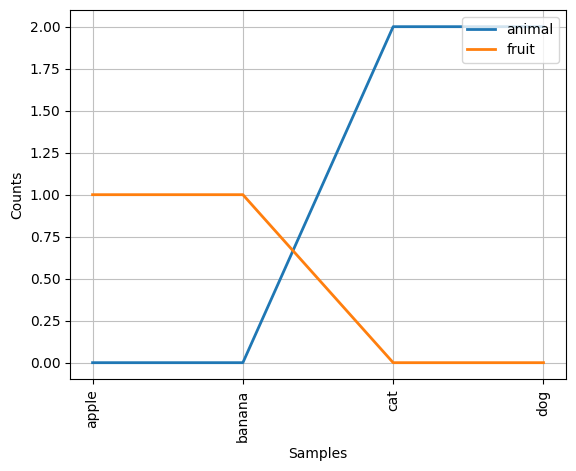

In [4]:
data = [("cat", "animal"), ("dog", "animal"), ("apple", "fruit"),
("banana", "fruit"), ("dog", "animal"), ("cat", "animal")]

cfd = nltk.ConditionalFreqDist((category, word) for word, category in data)

cfd.plot()

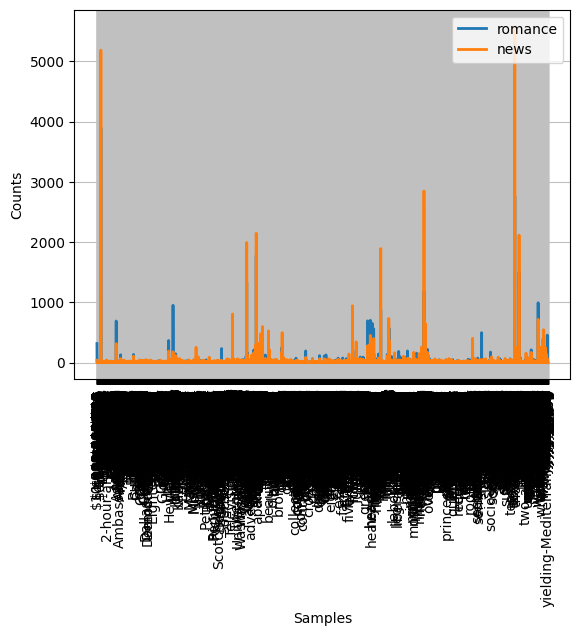

In [3]:
import nltk.corpus
from nltk.corpus import brown
import matplotlib.pyplot as plt

selected_genres = ["romance", "news"]

cfd = nltk.ConditionalFreqDist(
                            (genre, word)
                            for genre in selected_genres
                            for word in brown.words(categories=genre))

cfd.plot()
plt.show()

In [5]:
from nltk import FreqDist
from nltk.corpus import words

def reqCheck(word): 
    req_dict = {'e':1, 'g':1, 'i':1, 'v':2, 'r':1, 'o':1, 'n':1, 'l':1}
    freqWord = FreqDist(word)

    if len(word) >= 4:
        if 'r' in word:
             if word.isascii:
                if not word[0].isupper():
                    if not word.endswith('s'):
                        for char in word:
                            if char not in req_dict:
                                return False
                        for char, freq in freqWord.items():
                            if char in req_dict and freq > req_dict[char]:
                                return False
                        return True
    return False

word_list = words.words()

valid_words = [word for word in word_list if reqCheck(word)]

nine_letter_word = [nine for nine in valid_words if len(nine) == 9]

if nine_letter_word:
    print(nine_letter_word)
    print(valid_words)
else:
    print("ERROR")



['revolving']
['enrol', 'ergon', 'genro', 'girl', 'girn', 'giro', 'giver', 'glor', 'glore', 'glover', 'goer', 'goner', 'gore', 'gorlin', 'govern', 'grein', 'grin', 'groin', 'grove', 'grovel', 'ignore', 'inro', 'involver', 'iron', 'irone', 'levir', 'lienor', 'lier', 'liner', 'linger', 'lire', 'liver', 'livor', 'livre', 'loir', 'longer', 'lore', 'lori', 'lorn', 'lover', 'lovering', 'negro', 'nigre', 'noiler', 'noir', 'nori', 'norie', 'ogler', 'ogre', 'oiler', 'oner', 'oriel', 'orle', 'over', 'overling', 'regin', 'region', 'reign', 'rein', 'renvoi', 'reoil', 'revolving', 'rigol', 'rile', 'rine', 'ring', 'ringe', 'ringle', 'rive', 'rivel', 'riven', 'roil', 'role', 'rone', 'rove', 'roving', 'vergi', 'veri', 'vier', 'vigor', 'viner', 'violer', 'vire', 'vireo', 'virl', 'virole', 'viron', 'viver', 'girl', 'iron', 'over', 'ring']


In [6]:
import re

my_string = """
hello world
1223 
2020-05-20
Mr Simpson
Mrs Simpson
Mr. Brown
Ms Smith
Mr. T
"""

pattern = re.compile(r"Mr\.?\s\w+")

matches = pattern.finditer(my_string)

for match in matches:
    print(match)

<re.Match object; span=(30, 40), match='Mr Simpson'>
<re.Match object; span=(53, 62), match='Mr. Brown'>
<re.Match object; span=(72, 77), match='Mr. T'>


In [8]:
def freqDict(inputs):
    counts = {}

    for element in inputs:
        if element in counts:
            continue
        else:
            counts[element] = 1
    uniques = [i for i in counts if counts[i] == 1]
    return uniques

data = [1, 1, 2, 3, 3, 4, 5, 6, 6, 6, 7, 7, 8, 9, 9, 9, 9, 10]

uniDict = freqDict(data)

print(uniDict)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [13]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

df = pd.DataFrame({'text':['People watch Campusx','Campusx watch Campusx','People write Comment','Campusx write Comment']})
tfidf = TfidfVectorizer()
x = tfidf.fit_transform(df['text']).toarray()
features = list(tfidf.get_feature_names_out())
x = pd.DataFrame(x, columns=features,index=["D1","D2","D3","D4"])
x

,campusx,comment,people,watch,write
D1,0.496816,0.000000,0.613667,0.613667,0.000000
D2,0.850816,0.000000,0.000000,0.525464,0.000000
D3,0.000000,0.577350,0.577350,0.000000,0.577350
D4,0.496816,0.613667,0.000000,0.000000,0.613667


In [1]:
data = [1, 1, 2, 3, 3, 4, 5, 6, 6, 6, 7, 7, 8, 9, 9, 9, 9, 10]

unique_elements = set(data)

print(unique_elements)

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10}
